In [ ]:
#Including the required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from google.colab import drive
drive.mount('/content/drive/')
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive/


In [ ]:
#importing the csv file
air = pd.read_csv("milan.csv")

FileNotFoundError: ignored

In [ ]:
# viewing the dataset
air.head()

,name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,days_as_host,city
0,DA BICE,2015-10-12,within an hour,100.0,NaN,f,1,1,t,t,...,NaN,NaN,NaN,NaN,NaN,t,2,NaN,2237,Milan
1,LCDA Apartment 5 -CADORNA,2020-01-14,within an hour,100.0,100.0,f,3,3,t,t,...,NaN,NaN,NaN,NaN,NaN,t,12,NaN,682,Milan
2,"Navigli LOFT, with private garden",2012-01-11,within a few hours,100.0,0.0,f,1,1,t,t,...,4.98,4.96,4.94,4.43,4.63,f,1,0.48,3607,Milan
3,Prati 12,2018-11-09,NaN,NaN,NaN,t,1,1,t,t,...,4.89,4.82,4.95,4.89,4.82,t,1,1.60,1113,Milan
4,OPEN SPACE IN THE HEART OF MILAN,2013-03-19,NaN,NaN,NaN,f,1,1,t,t,...,5.00,5.00,5.00,5.00,5.00,f,1,0.05,3174,Milan


In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            2998 non-null   object 
 1   host_since                      3000 non-null   object 
 2   host_response_time              1825 non-null   object 
 3   host_response_rate              1825 non-null   float64
 4   host_acceptance_rate            1770 non-null   float64
 5   host_is_superhost               3000 non-null   object 
 6   host_listings_count             3000 non-null   int64  
 7   host_total_listings_count       3000 non-null   int64  
 8   host_has_profile_pic            3000 non-null   object 
 9   host_identity_verified          3000 non-null   object 
 10  room_type                       3000 non-null   object 
 11  accommodates                    3000 non-null   int64  
 12  bedrooms                        27

##### Now removing the irrelevant columns
##### The columns chosen in a basis of the objective of the problem
##### The independent and the dependent columns are chosen based on the domain knowledge and the good understanding of the problem

In [ ]:
#checking for null values
air.isna().sum()

name                                 2
host_since                           0
host_response_time                1175
host_response_rate                1175
host_acceptance_rate              1230
host_is_superhost                    0
host_listings_count                  0
host_total_listings_count            0
host_has_profile_pic                 0
host_identity_verified               0
room_type                            0
accommodates                         0
bedrooms                           238
beds                                25
price                               19
minimum_nights                       0
maximum_nights                       0
availability_365                     0
number_of_reviews                    0
number_of_reviews_ltm                0
number_of_reviews_l30d               0
review_scores_rating               723
review_scores_accuracy             765
review_scores_cleanliness          764
review_scores_checkin              765
review_scores_communicati

In [ ]:
air=air.dropna(subset=["name"])
# I'm choosing the column name because the name is the host and others columns are basically features of the host if the host is null its meaningless
air.shape

(2998, 33)

In [ ]:
#checking for duplicates
air=air.drop_duplicates()
air.shape

(2998, 33)

In [ ]:
air2 = air[["name","host_since","host_identity_verified","room_type","accommodates","bedrooms","beds","price","city","review_scores_cleanliness","availability_365","days_as_host","review_scores_value"]]
#These are the features which fluctuates the price of the room where the other features either deal with the Airbnb/Host features

In [ ]:
air2.head()

,name,host_since,host_identity_verified,room_type,accommodates,bedrooms,beds,price,city,review_scores_cleanliness,availability_365,days_as_host,review_scores_value
0,DA BICE,2015-10-12,t,Entire home/apt,3,1.0,2.0,45.0,Milan,NaN,111,2237,NaN
1,LCDA Apartment 5 -CADORNA,2020-01-14,t,Entire home/apt,4,1.0,2.0,130.0,Milan,NaN,365,682,NaN
2,"Navigli LOFT, with private garden",2012-01-11,t,Entire home/apt,5,2.0,3.0,100.0,Milan,4.98,291,3607,4.63
3,Prati 12,2018-11-09,t,Entire home/apt,2,NaN,1.0,65.0,Milan,4.89,48,1113,4.82
4,OPEN SPACE IN THE HEART OF MILAN,2013-03-19,t,Entire home/apt,5,2.0,3.0,300.0,Milan,5.00,0,3174,5.00


In [ ]:
air2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       2998 non-null   object 
 1   host_since                 2998 non-null   object 
 2   host_identity_verified     2998 non-null   object 
 3   room_type                  2998 non-null   object 
 4   accommodates               2998 non-null   int64  
 5   bedrooms                   2760 non-null   float64
 6   beds                       2973 non-null   float64
 7   price                      2979 non-null   float64
 8   city                       2998 non-null   object 
 9   review_scores_cleanliness  2236 non-null   float64
 10  availability_365           2998 non-null   int64  
 11  days_as_host               2998 non-null   int64  
 12  review_scores_value        2235 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage:

In [ ]:
#renaming the columns
air2=air2.rename(columns={"bedrooms":"bathrooms","review_scores_cleanliness":"Clean_score"})

In [ ]:
air2.isna().sum()

name                        0
host_since                  0
host_identity_verified      0
room_type                   0
accommodates                0
bathrooms                 238
beds                       25
price                      19
city                        0
Clean_score               762
availability_365            0
days_as_host                0
review_scores_value       763
dtype: int64

In [ ]:
air2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accommodates,2998.0,2.996998,1.489701,1.0,2.00,2.00,4.0,16.0
bathrooms,2760.0,1.243841,0.564407,1.0,1.00,1.00,1.0,7.0
beds,2973.0,1.738648,1.149043,0.0,1.00,1.00,2.0,15.0
price,2979.0,110.842229,99.265401,9.0,55.00,80.00,129.0,957.0
Clean_score,2236.0,4.705192,0.491975,0.0,4.61,4.86,5.0,5.0
availability_365,2998.0,136.330887,133.570639,0.0,0.00,90.00,274.5,365.0
days_as_host,2998.0,2208.944963,882.151322,47.0,1563.25,2392.00,2805.0,4663.0
review_scores_value,2235.0,4.612828,0.502717,0.0,4.50,4.73,4.9,5.0


In [ ]:
# Imputing the null values
air2["bathrooms"]=air2["bathrooms"].fillna(min(air2.bathrooms))
air2["beds"]=air2["beds"].fillna(min(air2.beds))
air2["price"]=air["price"].fillna(np.mean(air2["price"]))
air2["Clean_score"]=air2["Clean_score"].fillna(np.mean(air2['Clean_score']))
air2['review_scores_value']=air2["review_scores_value"].fillna(np.mean(air2['review_scores_value']))

In [ ]:
air2.isna().sum() # the Null values got imputed the dataset is now ready to analyzed.

name                      0
host_since                0
host_identity_verified    0
room_type                 0
accommodates              0
bathrooms                 0
beds                      0
price                     0
city                      0
Clean_score               0
availability_365          0
days_as_host              0
review_scores_value       0
dtype: int64

In [ ]:
air2['bathrooms']=air2['bathrooms'].astype(int)
air2['beds']=air2['beds'].astype(int)

## Exploratory Data Analytics

In [ ]:
air2['bathrooms'].value_counts()

1    2458
2     444
3      70
4      18
5       6
7       1
6       1
Name: bathrooms, dtype: int64

In [ ]:
air2['beds'].value_counts()

1     1408
2      965
3      276
0      137
4      133
5       44
6       19
7        7
9        3
8        3
15       1
12       1
10       1
Name: beds, dtype: int64

In [ ]:
air2['accommodates'].value_counts()

2     1258
4      800
3      388
1      247
6      132
5      115
7       23
8       17
10       9
9        4
16       1
12       1
14       1
15       1
11       1
Name: accommodates, dtype: int64

In [ ]:
air2['room_type'].value_counts()

Entire home/apt    2277
Private room        669
Shared room          41
Hotel room           11
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Histogram for Price')

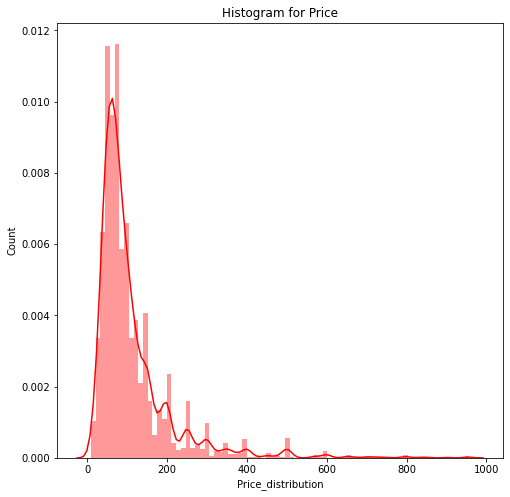

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(air2['price'],bins=80,color='RED')
plt.xlabel("Price_distribution")
plt.ylabel("Count")
plt.title("Histogram for Price")

Most number of room prices are in between 0 - 200.

Text(0.5, 0, 'Clean_score')

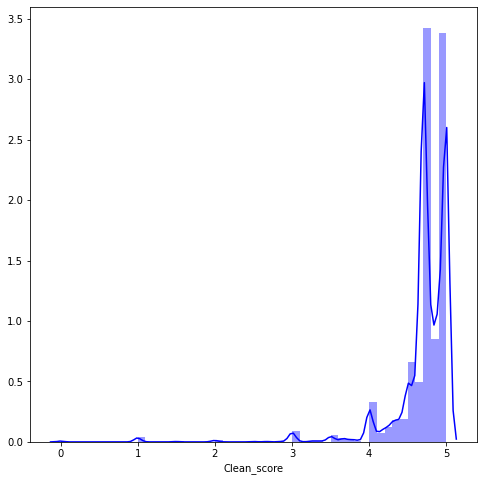

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(air2['Clean_score'],color='Blue')
plt.xlabel("Clean_score")

The distribution of cleanliness score is left skewed says that mean it above the median.

Text(0.5, 1.0, 'Countplot of Accommodation')

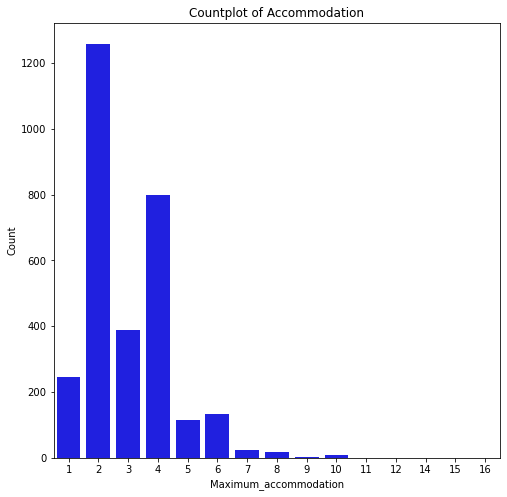

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(air2['accommodates'],color='Blue')
plt.xlabel("Maximum_accommodation")
plt.ylabel("Count")
plt.title("Countplot of Accommodation")

### More number of accommodations is for 2 persons.

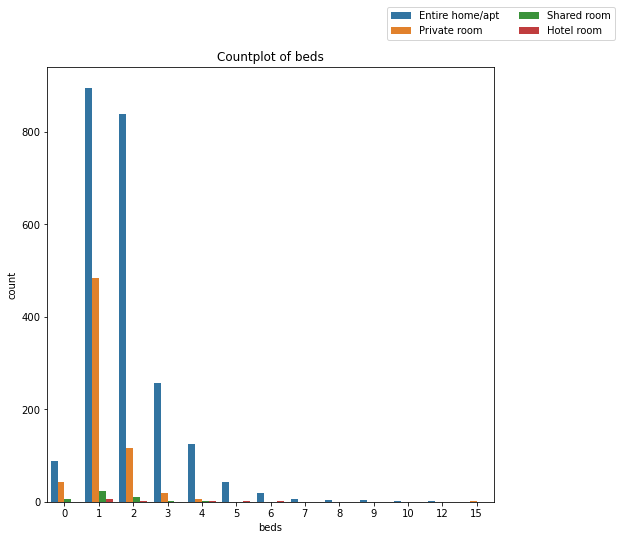

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(air2['beds'],hue=air2['room_type'])
plt.title("Countplot of beds")
plt.legend(bbox_to_anchor=(0.75, 1.15), ncol=2)

### The home apartments bedroom seems to have a single bed.

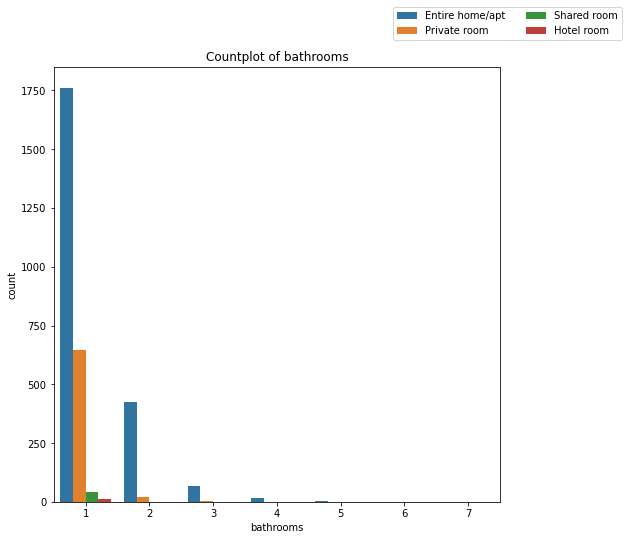

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot('bathrooms',hue='room_type',data=air2)
plt.title("Countplot of bathrooms")
plt.legend(bbox_to_anchor=(0.75, 1.15), ncol=2)

### The home apartment room type is mostly having a single bathroom compared to private room type.

Text(0.5, 1.0, 'Countplot of bathrooms')

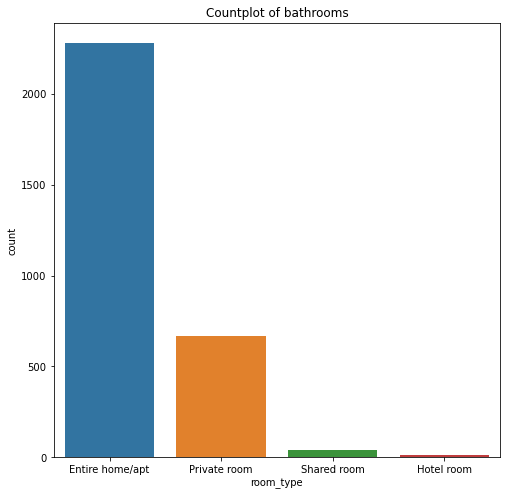

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(air2['room_type'])
plt.title("Countplot of bathrooms")

The count of home/apartment is more than other room types.

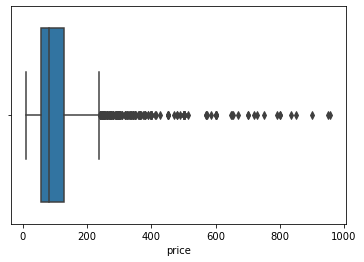

In [ ]:
sns.boxplot("price",data=air2)

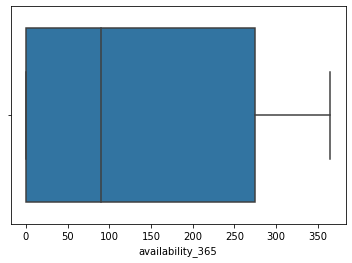

In [ ]:
sns.boxplot("availability_365",data=air2) # availability for the nexr year is right skewed.

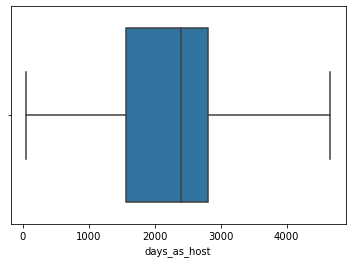

In [ ]:
sns.boxplot("days_as_host",data=air2) #The days spent by the host in the platform is left skewed

In [ ]:
air2.groupby(['host_identity_verified']).mean()['availability_365']

host_identity_verified
f    129.226708
t    138.274427
Name: availability_365, dtype: float64

### This shows that the truly verfied profiles seem to available more days in the coming year rather than non- verfied Profiles

In [ ]:
air2.groupby(['room_type']).mean()['price']

NameError: ignored

### The hotel room seems to be the costliest compared to other rooms in price and the shared room seems to be the lowest in price.

In [ ]:
air2.groupby(['host_identity_verified']).mean()['days_as_host']

host_identity_verified
f    1980.368012
t    2271.478335
Name: days_as_host, dtype: float64

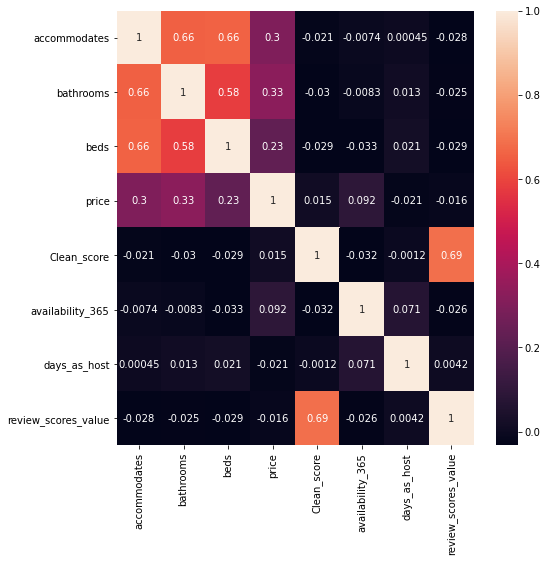

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(air2.corr(),annot=True)

In [ ]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
air2['room_type']= label_encoder.fit_transform(air2['room_type'])
air2['host_identity_verified']=label_encoder.fit_transform(air2['host_identity_verified'])

In [ ]:
X=air2.drop(['price','name','host_since','city'],axis=1)
y=air2['price']
X

,host_identity_verified,room_type,accommodates,bathrooms,beds,Clean_score,availability_365,days_as_host,review_scores_value
0,1,0,3,1,2,4.705192,111,2237,4.612828
1,1,0,4,1,2,4.705192,365,682,4.612828
2,1,0,5,2,3,4.980000,291,3607,4.630000
3,1,0,2,1,1,4.890000,48,1113,4.820000
4,1,0,5,2,3,5.000000,0,3174,5.000000
...,...,...,...,...,...,...,...,...,...
2995,0,0,3,1,3,5.000000,291,978,4.880000
2996,1,0,4,1,2,4.860000,96,1727,4.860000
2997,1,0,4,1,2,3.000000,260,2121,3.500000
2998,1,0,4,2,4,4.705192,281,2809,4.612828


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,4.232605,host_identity_verified
1,1.405048,room_type
2,12.273074,accommodates
3,10.952143,bathrooms
4,6.184242,beds
5,1.975153,availability_365
6,5.375396,days_as_host


In [ ]:
X=air2.drop(['price','name','host_since','city','review_scores_value','Clean_score'],axis=1) #the columns which have multicolinearity is dropped.

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)


(2248, 7)
(750, 7)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
predicted=regressor.predict(X_test)
#evaluation
score=r2_score(y_test,predicted)
print('r2 score is:',score)
mse=mean_squared_error(y_test,predicted)
print("mse: ",mse)

r2 score is: 0.1734340371890135
mse:  8559.15494592484


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
r2=r2_score(y_test,y_pred)
print("mse: ",r2)
mse=mean_squared_error(y_test,y_pred)
print("mse: ",mse)

mse:  0.16912057198597297
mse:  8603.821214181427


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
r2=r2_score(y_test,y_pred)
print("mse: ",r2)
mse=mean_squared_error(y_test,y_pred)
print("mse: ",mse)

mse:  0.173390307472718
mse:  8559.607770544235
